# Reinforcement Learning for Economics

# Introduction

**Reinforcement learning** is a particular category of **machine learning** concerned with how **agents** have to take **actions** in an **environment**. Upon doing actions, the environment **state** changes into a new state and the agent receives a **reward** or a penalty, according to the action that it has picked. Reinforcement learning aims at making this agent learn from his experience of interactions with environment so that it chooses the best actions that maximizes the sum of rewards it receives from the environment.

Reinforcement learning differs from standard supervised learning in that correct **input/output** pairs need not be presented, and sub-optimal actions need not be explicitly corrected. Instead the focus is on performance, which involves finding a balance between **exploration** (of uncharted territory) and **exploitation** (of current knowledge).

![title](http://simplecore-dev.intel.com/ai/wp-content/uploads/sites/71/OpenAI-Gym-integration.png)

The elements that consistute a reinforcement learning algorithm are:

- **Environment**: The world through which the agent moves. The environment takes the agent's current state and action as input, and returns as output the agent's reward and its next state.
- **Agent**: An agent picks the actions that are to be performed in the environment, it's the actual algorithm, the core part of the reinforcement learning model. There are many ways to choose the "right action", favoring either the already obtained reward or the expected reward. In many real cases it's hard to estimate the actual reward of an action because the reward is retrieved only after a long time and exploring all the possible actions might be unfeasible. The agent has to find a balance between exploration of the possible actions and exploitation (execution) of the evaluated actions.  
- **Action (A)**: A is the set of all possible moves that the agent can make. The agent chooses among a list of possible actions the one that maximizes the best reward in the future, given the state that it finds itself in.  
- **State (S)**: A state characterizes the situation in which the agent finds itself, it's strictly connected to the environment. The state is updated when the agent takes an action. Usually the agent is aware that performing a certain series of actions would bring it in a certain state and it tries to figure out whether it would be better off in that state or in the current one, based on the reward obtained. In other more challenging environments (such as imperfect information games) performing the same actions will deliver a different state (stochasticity).
- **Reward (R)**: A reward is the feedback by which we measure the success or failure of an agent's actions. From any given state, an agent sends output in the form of actions to the environment, and the environment returns the agent's new state (which resulted from acting on the previous state) as well as rewards. Rewards can be immediate or delayed, they effectively evaluate the agent's action.
- **Policy (π)**: The policy is the strategy that the agent employs to determine the next action based on the current state. It maps states to actions, the actions that promise the highest reward.
- **Discount factor (γ)**: The discount factor is multiplied by future rewards as discovered by the agent in order to dampen these rewards' effect on the agent's choice of action. It is designed to make future rewards worth less than immediate rewards, enforcing a kind of short-term hedonism in the agent.
- **Value (V)**: The expected long-term return with discount, as opposed to the short-term reward R. Vπ(s) is defined as the expected long-term return of the current state under policy π. We discount rewards, or lower their estimated value, the further into the future they occur. The concept of discounting future rewards is based around Keynes quote: *«In the long run, we are all dead»*.
- **Q-value (Q)**: Q-value is similar to Value, except that it takes an extra parameter, the current action a. Qπ(s, a) refers to the long-term return of the current state s, taking action a under policy π. Q maps state-action pairs to rewards. Note the difference between Q and policy.


# Markov Decision Process

Many reinforcement learning problems can be described mathematically using a framework called **Markov Decision Processes** (**MDPs**). MDPs are extended version of **Markov Chain** which adds decisions and rewards elements to it, as many reinforcement learning algorithms for this context utilize dynamic programming techniques. The word Markov here refers to that **Markovian property** which means that future state is independent from any previous states history given the current state and action. This is a fancy way of saying that current state encapsulates all what is needed to decide the future state when an input action is received. This is a reasonable assumption in many problems and it simplifies things a lot. 

Formally, a MDP is defined as a tuple of 5 items <S, A, P, R, 𝛾> which are:

* **S**: Set of observations. The agent observes the environment state as one item of this set.
* **A**: Set of actions. The set of actions the agent can choose one from to interact with the environment.
* **P**: P(s' | s, a) transition probability matrix. This models what next state s' will be after the agent makes action a while being in the current state s.
* **R**: P(r | s, a) reward model that models what reward the agent will receive when it performs action a when it is in state s.
* **γ**: Discount factor. This factor is a numerical value between 0 and 1 that represents the relative importance between immediate and future rewards. A discount factor of 1 would make future rewards worth just as much as immediate rewards. If γ is .8, and there's a reward of 10 points after 3 time steps, the present value of that reward is 0.8³ x 10. 

The goal of a reinforcement learning agent is to collect as much reward as possible, thus solving the MDP by finding **optimal policy**, which means finding the sequence of action it can make to maximize the total received reward. The agent can (possibly randomly) choose any action as a function of the history of observations and of the expected rewards.

The main difference between the classical **dynamic programming** methods and reinforcement learning algorithms is that the latter do not assume knowledge of an exact mathematical model of the MDP and they target large MDPs where exact methods become infeasible.

Rules are often **stochastic**. The observation typically involves the scalar, immediate reward associated with the last transition. In many works, the agent is assumed to observe the current environmental state (full observability). If not, the agent has partial observability. Sometimes the set of actions available to the agent is restricted (a zero balance cannot be reduced).

When the agent's performance is compared to that of an agent that acts optimally, the difference in performance gives rise to the notion of **regret**. In order to act near optimally, the agent must reason about the long term consequences of its actions, although the **immediate reward** associated with this might be negative.

Two elements make reinforcement learning powerful: the use of **samples** to optimize performance and the use of **function approximation** to deal with large environments. Thanks to these two key components, reinforcement learning can be used in large environments in the following situations:

* A model of the environment is known, but an analytic solution is not available
* Only a simulation model of the environment is given (the subject of simulation-based optimization)
* The only way to collect information about the environment is to interact with it

The first two of these problems could be considered planning problems (since some form of model is available), while the last one could be considered to be a genuine learning problem. However, reinforcement learning converts both planning problems to machine learning problems. 

# Exploration vs. Exploitation tradeoff
Online decision making involves a fundamental choice between **exploitation** (make the best decision given current information) and **exploration** (gather more information). The best long–term strategy may involve short–term sacrifices: gather enough information to make the best overall decisions.

Reinforcement learning requires clever exploration mechanisms. Randomly selecting actions, without reference to an estimated probability distribution, shows poor performance. The case of (small) finite Markov decision processes is relatively well understood. However, due to the lack of algorithms that provably scale well with the number of states (or scale to problems with infinite state spaces), simple exploration methods are the most practical.

One such method is **ϵ-greedy**, when the agent chooses the action that it believes has the best long-term effect with probability 1 − ϵ. If no action which satisfies this condition is found, the agent chooses an action uniformly at random. Here, 0 < ϵ < 1 is a tuning parameter, which is sometimes changed, either according to a fixed schedule (making the agent explore progressively less), or adaptively based on heuristics.

# A simple application: sum two numbers

A simple example of a possible reinforcement learning algorithm can be building an agent that learns how to **sum two numbers**. The technique used in this model makes use of **dynamic programming**, a collection of algorithms that can be used to compute optimal policies given a **perfect model** of the environment as a Markov decision process (MDP). Classical DP algorithms are of limited utility in reinforcement learning both because of their assumption of a perfect model and because of their great **computational expense**, but they are still important theoretically and they work well when the environment is simple and the number of available states is low.

In this brief snip of python code, we create a **class** representing the agent, that will attempt to sum two numbers, taken between 0 and 5 (included).

The **Agent** is initialized with **3 matrices** (of size *6x6*), **truth_mat**, **guess_mat**, and **reward_mat** with all elements initially set to *None*, that will be populated with values. They are characterized as follows:

- **truth_mat** contains the **true sum** of the indices
- **guess_mat** contains the **guessed sum** of the indices 
- **reward_mat** contains the **difference** between guessed and true values

The Agent picks a couple of numbers, it tries to guess the sum, storing the result in the corresponding entry in guess_mat, it computes the actual sum of the numbers, storing the result in truth_mat and it calculates the reward obtained, which is the difference between the true value and the guess value, storing the result in the corresponding entry in reward_mat. The reward is not taken as absolute value, it can be positive or negative. 

The aim of the agent is to have **all** entries in reward_mat equal to **zero**, which means that guess_mat and truth_mat are to become equal eventually, this task is accomplished according in different ways, execute one of the **run_** methods, explained below.

The learning algorithm is applied **recursively**, once to each couple of numbers between *0* and *5* so that after each iteration we can have an estimate of the **total error**, calculated as the sum of the absolute values of the elements of reward_mat.

The Agent is equipped with different methods, the functioning of which is explained in the *docstring*. Let's first run the code, and then go through each one of them.

In [30]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt

class Agent():
    def __init__(self):
        self.truth_mat = np.matrix(np.full((6,6),None))
        self.guess_mat = np.matrix(np.full((6,6),None))
        self.reward_mat = np.matrix(np.full((6,6),None)) 

        self.x = []
        self.y = []
        self.counter = 0

    def reset(self):
        '''
        reset the agent
        '''
        self.truth_mat = np.matrix(np.full((6,6),None))
        self.guess_mat = np.matrix(np.full((6,6),None))
        self.reward_mat = np.matrix(np.full((6,6),None))
        self.x = []
        self.y = []
        self.counter = 0

    @staticmethod
    def guess(a,b):
        '''
        returns random guess of the sum a + b
        '''
        return np.random.randint(0,11)
    
    def ask(self,a,b):
        '''
        ask the agent the sum of two numbers
        '''
        return self.guess_mat[a,b]

    def run_rnd(self,step=None,verbose=False):
        '''
        The agent learns how to sum two numbers included in [0,5]
        cycle over all elements of matrices, for each element randomly guess a
        sum, evaluate the true sum and calculate the difference (reward).
        All the informations are stored in agent's memory in the form of
        matrices.
        Params:
            step: (int) execute a given number of cycles. Learning can be
                  examined through *_mat variables and resumed later
            verbose: print the reward matrix each timestep
        Returns a plot of the average reward (y) over timesteps(x)
        '''
        if step:
            for _ in range(step):
                for i in range(6):
                    for j in range(6):
                        self.truth_mat[i,j] = i + j
                        if self.reward_mat[i,j] != 0:
                            self.guess_mat[i,j] = self.guess(i,j)
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                self.counter += 1
                self.x.append(self.counter)
                self.y.append(np.sum(np.abs(self.reward_mat)))
                print('Cycle:{} Reward average:{:.3f} Error:{}'.format(self.counter,np.mean(self.reward_mat),np.sum(np.abs(self.reward_mat))))
                if verbose:
                    print('Reward matrix:\n',self.reward_mat,end='\n\n')   
        else:
            while np.all(self.reward_mat == 0) == False:
                for i in range(6):
                    for j in range(6):
                        self.truth_mat[i,j] = i + j
                        if self.reward_mat[i,j] != 0:
                            self.guess_mat[i,j] = self.guess(i,j)
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                self.counter += 1
                self.x.append(self.counter)
                self.y.append(np.sum(np.abs(self.reward_mat)))
                print('Cycle:{} Reward average:{:.3f} Error:{}'.format(self.counter,np.mean(self.reward_mat),np.sum(np.abs(self.reward_mat))))
                if verbose:
                    print('Reward matrix:\n',self.reward_mat,end='\n\n')   
        fig, ax = plt.subplots()
        ax.plot(self.x,self.y)
        ax.set_title('Run Random')
        ax.set_xlabel('Cycles')
        ax.set_ylabel('Error')
        return plt.show()
        return plt.show()

    def run_smart(self,step=None,verbose=False):
        '''
        The agent learns how to sum two numbers included in [0,5],
        cycle over all elements of matrices.
        For each element: if the reward is not set take a guess,
        evaluate the true sum and calculate the reward),
        if the reward is negative increase the previous guess by 1,
        if the reward is positive decrease the
        previous guess by 1. All the informations are stored in agent's memory 
        in the form of matrices.
        Params:
            step: (int) execute a given number of cycles. Learning can be
                  examined through *_mat variables and resumed later
            verbose: print the reward matrix each timestep
        Returns a plot of the average reward (y) over timesteps(x)
        '''
        if step:
            for _ in range(step):
                for i in range(6):
                    for j in range(6):
                        self.truth_mat[i,j] = i + j
                        if self.reward_mat[i,j] == None:
                            self.guess_mat[i,j] = self.guess(i,j)
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                        elif self.reward_mat[i,j] > 0:
                            self.guess_mat[i,j] -= 1
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                        elif self.reward_mat[i,j] < 0:
                            self.guess_mat[i,j] += 1
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                self.counter += 1
                self.x.append(self.counter)
                self.y.append(np.sum(np.abs(self.reward_mat)))
                print('Cycle:{} Reward average:{:.3f} Error:{}'.format(self.counter,np.mean(self.reward_mat),np.sum(np.abs(self.reward_mat))))
                if verbose:
                    print('Reward matrix:\n',self.reward_mat,end='\n\n')
        else:
            while np.all(self.reward_mat == 0) == False:
                for i in range(6):
                    for j in range(6):
                        self.truth_mat[i,j] = i + j
                        if self.reward_mat[i,j] == None:
                            self.guess_mat[i,j] = self.guess(i,j)
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                        elif self.reward_mat[i,j] > 0:
                            self.guess_mat[i,j] -= 1
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                        elif self.reward_mat[i,j] < 0:
                            self.guess_mat[i,j] += 1
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                self.counter += 1
                self.x.append(self.counter)
                self.y.append(np.sum(np.abs(self.reward_mat)))                
                print('Cycle:{} Reward average:{:.3f} Error:{}'.format(self.counter,np.mean(self.reward_mat),np.sum(np.abs(self.reward_mat))))
                if verbose:
                    print('Reward matrix:\n',self.reward_mat,end='\n\n')
        fig, ax = plt.subplots()
        ax.plot(self.x,self.y)
        ax.set_title('Run Smart')
        ax.set_xlabel('Cycles')
        ax.set_ylabel('Error')
        return plt.show()

To initialize the Agent we simply write:
```
new = Agent()
```
As you can see from the **\_\_init\_\_** method this sets up the three matrices used for learning and also two internal list variables that will help to **plot** the progress of the algorithm. The *counter* variable is used to keep track of the number of learning cycles elapsed so that we can mix different learning algorithms easily.

The **state** of the Agent is represented by these internal variables, mainly *guess_mat* and *reward_mat*, while *true_mat* can be interpreted as the **environment** that the Agent samples.  

## A naive learning rule: run_rnd 
We can now initialize the **Agent** and try the simplest of the learning algorithms provided, **run_rnd**.

This algorithm **guesses randomly** the sum of two numbers each time updating the corresponding entry in *guess_mat* and *reward_mat*. It stops updating the entry for a couple of numbers when it guesses correctly and the **reward is zero**, which is guarantee to happen eventually given the *law of large numbers*. When each entry in the reward matrix is zero, the learning finishes since the Agent has correctly learned how to sum any couple of numbers, having memorized the right value in *guess_mat*.

For each learning cycle *run_rnd* prints the *cycle number*, the *reward average* and the *total error*. At the end it displays a **graph** of the *total error* as function of the *cycle number*. Notice that that the **error** is not a *monotonic* function, sometimes it increases considerably, because the Agent only knows if the guess is right or wrong and cannot improve on the previous guess, it just keeps guessing randomly. 

Cycle:1 Reward average:0.667 Error:120
Cycle:2 Reward average:0.389 Error:86
Cycle:3 Reward average:-0.028 Error:97
Cycle:4 Reward average:0.028 Error:83
Cycle:5 Reward average:-0.528 Error:85
Cycle:6 Reward average:0.472 Error:59
Cycle:7 Reward average:0.417 Error:63
Cycle:8 Reward average:0.167 Error:34
Cycle:9 Reward average:-0.139 Error:51
Cycle:10 Reward average:0.056 Error:26
Cycle:11 Reward average:-0.444 Error:36
Cycle:12 Reward average:0.083 Error:29
Cycle:13 Reward average:-0.056 Error:30
Cycle:14 Reward average:-0.139 Error:31
Cycle:15 Reward average:0.167 Error:20
Cycle:16 Reward average:0.167 Error:22
Cycle:17 Reward average:0.306 Error:15
Cycle:18 Reward average:0.000 Error:18
Cycle:19 Reward average:0.528 Error:21
Cycle:20 Reward average:0.028 Error:13
Cycle:21 Reward average:0.333 Error:14
Cycle:22 Reward average:-0.056 Error:16
Cycle:23 Reward average:-0.083 Error:15
Cycle:24 Reward average:-0.111 Error:10
Cycle:25 Reward average:0.028 Error:5
Cycle:26 Reward average:0

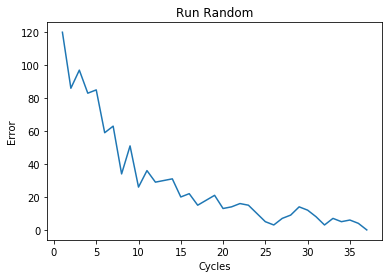

In [31]:
new = Agent()
new.run_rnd()

## A smarter learning rule: run_smart
Randomly guessing the sum of the numbers is a **slow** strategy (doesn't scale for bigger numbers) and not really reliable, as you can see from the graph of the error, sometimes it goes up more than we would like. More importantly, *run_rnd* is not improving on previous guesses so it's closer to **memorizing** than to actual learning. A better strategy would be to use the **last guess** as a starting point and move up or down from there. 

Since we have defined the error as the difference between the actual sum value and the guess we know if we are underestimating or overestimating the value. Therefore, we can implement the following approach: 

- at the beginning the algorithm guesses the value randomly
- in successive iterations, if the *guessed_value* is different than the *true_value*:
    - if *less*, increase *guessed_value* by *1*
    - if *more*, decrease *guessed_value* by *1*

Cycle:1 Reward average:-0.028 Error:103
Cycle:2 Reward average:0.139 Error:73
Cycle:3 Reward average:0.194 Error:49
Cycle:4 Reward average:0.194 Error:31
Cycle:5 Reward average:0.139 Error:19
Cycle:6 Reward average:0.111 Error:10
Cycle:7 Reward average:0.111 Error:4
Cycle:8 Reward average:0.056 Error:2
Cycle:9 Reward average:0.000 Error:0


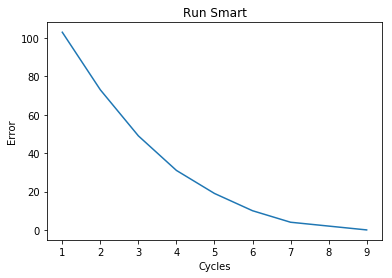

In [32]:
new.reset()
new.run_smart()

We can see that the smart algorithm takes way **less cycles than** the random one, and, most importantly, the error function decreases **smoothly** (now it is in fact monotonic). 

This approach is consistent with the **MDP** framework explained above, since the next state depends only on the current state.

## Examining the algorithms

When the algorithms are run, they print out the learning for each cycle, composed of the net (positive) sum of the error. There is also a *verbose* parameter that can be turned on, to print the full reward matrix for each cycle and show the progression of learning step by step. 

The **.reset()** method forces the Agent to forget the learning done, if present.

Cycle:1 Reward average:0.111 Error:134
Reward matrix:
 [[5 2 5 0 -1 5]
 [6 -2 7 5 3 2]
 [1 3 3 -3 -2 -1]
 [4 -3 4 4 -7 2]
 [3 -2 -1 -3 -3 -9]
 [5 -6 -7 -4 -5 -6]]

Cycle:2 Reward average:0.083 Error:99
Reward matrix:
 [[4 1 4 0 0 4]
 [5 -1 6 4 2 1]
 [0 2 2 -2 -1 0]
 [3 -2 3 3 -6 1]
 [2 -1 0 -2 -2 -8]
 [4 -5 -6 -3 -4 -5]]

Cycle:3 Reward average:0.000 Error:68
Reward matrix:
 [[3 0 3 0 0 3]
 [4 0 5 3 1 0]
 [0 1 1 -1 0 0]
 [2 -1 2 2 -5 0]
 [1 0 0 -1 -1 -7]
 [3 -4 -5 -2 -3 -4]]

Cycle:4 Reward average:-0.083 Error:43
Reward matrix:
 [[2 0 2 0 0 2]
 [3 0 4 2 0 0]
 [0 0 0 0 0 0]
 [1 0 1 1 -4 0]
 [0 0 0 0 0 -6]
 [2 -3 -4 -1 -2 -3]]

Cycle:5 Reward average:-0.167 Error:26
Reward matrix:
 [[1 0 1 0 0 1]
 [2 0 3 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 -3 0]
 [0 0 0 0 0 -5]
 [1 -2 -3 0 -1 -2]]

Cycle:6 Reward average:-0.194 Error:13
Reward matrix:
 [[0 0 0 0 0 0]
 [1 0 2 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 -2 0]
 [0 0 0 0 0 -4]
 [0 -1 -2 0 0 -1]]

Cycle:7 Reward average:-0.111 Error:6
Reward matrix:
 [[0 0 

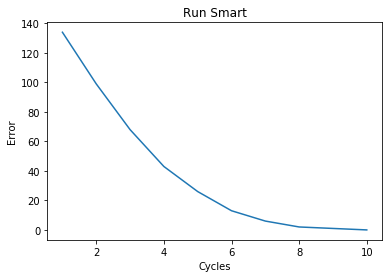

In [33]:
new.reset()
new.run_smart(verbose=True)

## Mixing algorithms

The algorithms are also provided with an early stopping parameter called "**steps**", we can decide to stop one of them before learning is complete and switch to the other one. Each step of learning evaluates one value for each entry couple of numbers. A **graph** is shown at the end of each partial learning run, according to the algorithm used, its title is set according to the last algorithm run. 

Cycle:1 Reward average:0.889 Error:132
Cycle:2 Reward average:0.250 Error:111
Cycle:3 Reward average:-0.556 Error:86
Cycle:4 Reward average:0.278 Error:104
Cycle:5 Reward average:0.361 Error:97


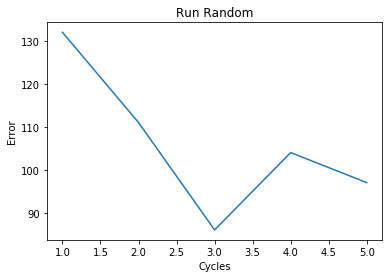

Cycle:6 Reward average:0.250 Error:75
Cycle:7 Reward average:0.111 Error:56
Cycle:8 Reward average:0.028 Error:39


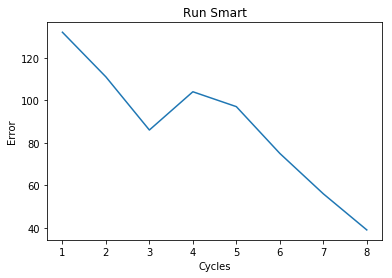

Cycle:9 Reward average:0.556 Error:46
Cycle:10 Reward average:0.583 Error:61
Cycle:11 Reward average:0.000 Error:28
Cycle:12 Reward average:0.000 Error:20
Cycle:13 Reward average:-0.028 Error:11


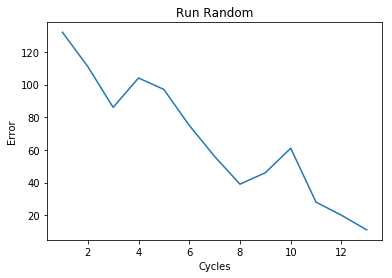

Cycle:14 Reward average:-0.056 Error:6
Cycle:15 Reward average:-0.028 Error:3
Cycle:16 Reward average:0.000 Error:0


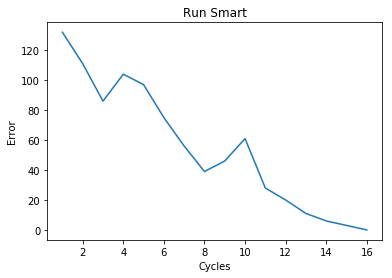

In [34]:
new.reset()

new.run_rnd(5)
new.run_smart(3)
new.run_rnd(5)
new.run_smart(3)

## Querying the Agent
At any time that we like, we can **query** the Agent and ask him what is the sum of two numbers. We can retrieve different answers in different situations: when learning was not yet started (no answer), when learning was stopped early (likely wrong answer), when learning is complete (right answer).

In [35]:
#learning not yet started (no answer)
new.reset()
new.ask(3,4)

Cycle:1 Reward average:-0.306 Error:123
Cycle:2 Reward average:-0.333 Error:88
Cycle:3 Reward average:-0.222 Error:60


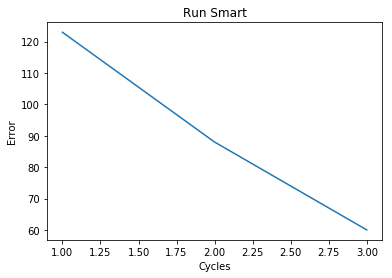

7

In [36]:
#learning stopped early (likely wrong answer)
new.run_smart(3)
new.ask(3,4)

Cycle:1 Reward average:-0.139 Error:117
Cycle:2 Reward average:-0.167 Error:84
Cycle:3 Reward average:-0.111 Error:56
Cycle:4 Reward average:-0.083 Error:37
Cycle:5 Reward average:-0.083 Error:21
Cycle:6 Reward average:-0.028 Error:11
Cycle:7 Reward average:0.000 Error:4
Cycle:8 Reward average:0.000 Error:2
Cycle:9 Reward average:0.000 Error:0


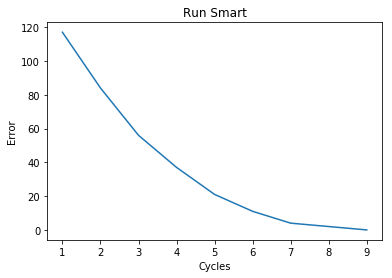

7

In [37]:
#learning complete (right answer)
new.reset()
new.run_smart()
new.ask(3,4)

# An economics task: price fixing
There are many tasks in **classical economics** that can be studied with the approach of reinforcement learning. A simple one is the quest of **optimal pricing** or price fixing. The question to be addressed is: "*in a monopoly market, given an unknown (but sampleable) demand curve, what is the price that maximizes revenue?*"

The model that will allow us to answer this question will be built on the knowledge that we have obtained developing the previous task, with some noticeable differences. The algorithm used to converge to the optimal price will still be implemented in the style of **dynamic programming**, although we won't be able to explore the whole space of states. Since we are not exploring all the possible states another question rises naturally: "*how do we know that this is the actual optimal price value?*" We will explain how to deal with this later briefly.  

Our **Agent()** is now a **shop-keeper** that needs to decide if the **price** as to be increased or decreased, given only the **revenue** as answer. As put in this manner, we already see that we can use the revenue as a proxy for the **reward**. The Agent is bound to a **demand curve** that he doesn't see in its entirety, but it can infer its shape, improving each time that the price is set by it. This is one of the differences between this problem and the previous sum example faced above. Another important distinction that needs to be underlined is that the current  state of the Agent is represented as a chosen value, the price, while in the former example the state was simply represented by the entries of the matrix *guess_mat*. The Agent tries different prices it needs to remember the one that yielded the highest revenue, the *best_price*, picked among all prices that it has sampled. 

The class **Curve()** provides the **environment** to which the Agent is bound to. When initiated, *Curve* can represent different types of demand curves, depending on the setting of the parameter **kind**. In this model, the demand curve is made of *numpy arrays*, so all values are discretized and they can be controlled via optional parameters (such as *num* for the range). To be able to perform the **sampling**, the Agent is initiated in a given environment via the **world** variable. This way, the whole *Curve* remains hidden (unused) while the *Curve* sampling method becomes accessible.

Let's run the code and then explore it interactively:

In [38]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt

class Curve():
    '''
    Initialize a linear demand curve with discretized q
    Params:
        kind='linear': linear curve (alpha is the slope)
             'hyperbola': equilateral hyperbola curve
             'cos': cosine sector 
             'noise': linear curve with noise (increase noise with num parameter)
             'log': log curve
        alpha: scale factor of the linear curve
        num: range of demand q 
    '''
    def __init__(self,kind='linear',num = 50, alpha = 1):
        if num > 50:        #we want to have at least 50 points in our demand curve
            self.q = np.linspace(0,num,num+1)
        else:
            self.q = np.linspace(0,num,50)
        
        if kind == 'linear':
            self.p = alpha*self.q[::-1]
        elif kind == 'hyperbola':
            self.q = self.q[1:]
            self.p = 1/(self.q) 
        elif kind == 'cos':
            self.p = num*np.cos(self.q/num)
        elif kind == 'noise':
            self.p = alpha*self.q[::-1]
            self.p = np.array([np.abs(i + np.random.random()*(num/20) - np.random.random()*(num/20)) for i in self.p])
        elif kind == 'log':
            self.q = self.q[1:]
            self.p = np.log(num/self.q)

    def plot(self):
        '''
        Plot the demand curve in a cartesian plan
        '''
        fig, ax = plt.subplots()
        ax.plot(self.q,self.p)
        ax.set_title('Demand Curve')
        ax.set_xlabel('Quantity')
        ax.set_ylabel('Price')
        return plt.show()
    
    def plot_revenue(self):
        '''
        Plot the revenue curve in a cartesian plan
        '''
        r = self.p*self.q
        self.p, r = zip(*sorted(zip(self.p, r)))
       
        fig, ax = plt.subplots()
        ax.plot(self.p,r)
        ax.set_title('Revenue Curve')
        ax.set_xlabel('Price')
        ax.set_ylabel('Revenue')        
        return plt.show()

    def sample(self,price=None):
        '''
        Sample the demand curve, given a price.
        Returns a revenue, 
        Params:
            price: if None samples the curve randomly
        '''
        if price is None:
            price = np.random.choice(self.p)
        
        demand = np.random.choice(np.where(self.p == self.find_nearest(self.p,price))[0])

        revenue = price*demand
        
        return (price, revenue)
    
    @staticmethod
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return array[idx]
        
class Agent():
    ''' 
    This agent can set a price and sample
    the world to obtain a revenue
    '''
    def __init__(self,kind='linear'):
        self.memory = dict()
        self.world = Curve(kind=kind) #attach to a world
        self.best_price = None
        self.best_revenue = None
    
    def flush_mem(self):
        self.memory = dict()
        self.best_price = None
        self.best_revenue = None

    def sample(self,price=None):
        '''
        Sample from the world according to price
        if 'price' is not set, samples randomly
        returns the set price and the respective revenue  
        '''
        (price,revenue) = self.world.sample(price)        
        self.memory[price] = revenue
        return (price,revenue)
    
    def plot_revenue(self):
        '''
        Plot sampled revenue curve, given prices 
        '''
        lists = sorted(self.memory.items())
        price, revenue = zip(*lists)
        fig, ax = plt.subplots()
        ax.plot(price,revenue)
        if self.best_price:
            ax.plot(self.best_price,self.best_revenue,'or')
        ax.set_title('Revenue Curve (sampled)')
        ax.set_xlabel('Price')
        ax.set_ylabel('Revenue')
        return plt.show()
    
    def plot_demand(self):
        '''
        Plot sampled demand curve, given prices 
        '''
        from copy import deepcopy
        self.demand = deepcopy(self.memory)
        for price,revenue in self.memory.items():
            self.demand[price] = self.memory[price]/price
        price = sorted(self.demand, key=self.demand.get)
        demand = sorted(self.demand.values())
        fig, ax = plt.subplots()
        ax.plot(demand,price)
        ax.set_title('Demand Curve (sampled)')
        ax.set_xlabel('Quantity')
        ax.set_ylabel('Price')
        return plt.show()
    
    def run_rnd(self,steps=9999,occ=3,plot=None):
        '''
        Random pocket algorithm
        Samples the world always randomly, retains the price with max revenue
        Breaks due to early stopping or stochastically
        Params:
            steps: early stopping number (int)
            occ:  counts best_revenue occurrences (int)
            plot: plot sampled revenue and demand every plot steps (int)
        '''
        flag = 0
        i = 0
        while (flag < occ and i < steps):
            (price,revenue) = self.sample()
            if not self.best_revenue or revenue > self.best_revenue:
                self.best_revenue = revenue
                self.best_price = price
                flag = 0
            if revenue == self.best_revenue:
                flag += 1
            if plot:
                self.plot_revenue()
                print('Run:{} Price:{:.3f} Revenue:{:.3f}'.format(i,price,revenue),end='\n\n')
            else:
                print('Run:{} Price:{:.3f} Revenue:{:.3f}'.format(i,price,revenue))         
            i += 1
        print('Best price:{:.3f} Best revenue:{:.3f}'.format(self.best_price,self.best_revenue))
        return (self.best_price,self.best_revenue)
    
    def run_smart(self,rate=1,exp=2,steps=9999,plot=None):
        '''
        Simple Memory Algorithm
        
        Params:
            rate: price rate change(int)
            steps: early stopping number (int)
        '''
        price_more = 0
        price_less = 0
        revenue_less = 0
        revenue_more = 0
        flag = 0
        
        i = 0
        while (flag < exp and i < steps):
            if i == 0:
                (price,revenue) = self.sample()
                self.best_revenue = revenue
                self.best_price = price
            else:
                (price_more,revenue_more) = self.sample(self.best_price+rate)
                (price_less,revenue_less) = self.sample(self.best_price-rate)
                if revenue_more > self.best_revenue:
                    self.best_revenue = revenue_more
                    self.best_price = price_more
                    flag = 0
                elif revenue_less > self.best_revenue:
                    self.best_revenue = revenue_less
                    self.best_price = price_less
                    flag = 0
                else:
                    flag += 1
            i += 1
            print('Run:{} Price:{:.3f} Revenue:{:.3f}'.format(i,self.best_price,self.best_revenue))
            print('Exploring rx price:{:.3f} yielding revenue:{:.3f}'.format(self.best_price+rate,revenue_more))
            print('Exploring lx price:{:.3f} yielding revenue:{:.3f}'.format(self.best_price-rate,revenue_less))
            if plot:
                self.plot_revenue()
        print ('Best price:{:.3f} Best revenue:{:.3f}'.format(self.best_price,self.best_revenue))
        return (self.best_price,self.best_revenue)

## The Environment
Before diving into the actual reinforcement learning, let's have a brief look at the **environment** that we are dealing with.

The *Curve()* class generates a **demand curve** that can be explored via the **sample method** with the *price* as argument, and it returns the associated revenue:

In [39]:
world = Curve()
world.sample(10)

(10, 390)

If the *price* is not given the *Curve* is **randomly** sampled:

In [40]:
world.sample()

(20.408163265306122, 591.8367346938776)

The Curve class is equipped with plotting methods, **plot**, for plotting the demand curve, and **plot_revenue**, for plotting the associated revenue curve:

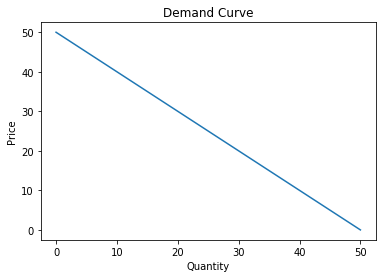

In [41]:
world.plot()

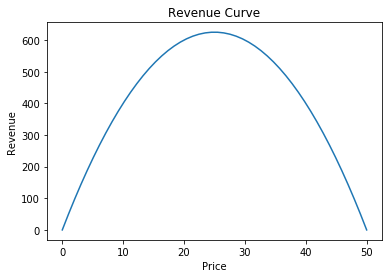

In [42]:
world.plot_revenue()

There are different types of demand curves that can be generated, according to the given **kind** parameter. The default one is the usual **linear** curve, the slope of which can be changed via the **alpha** parameter.

Let's have a brief look at the other kinds of curves available. For example the (equilateral) **hyperbola** is known in economics because it yields a **constant revenue** across the range of all possible prices, as we can see in the following graph:  

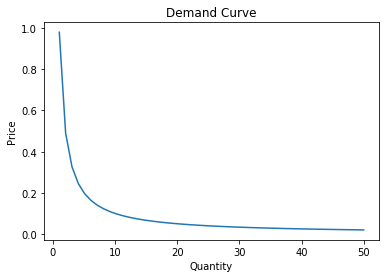

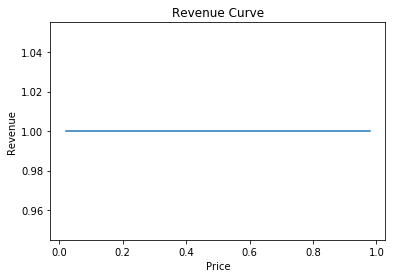

In [43]:
world = Curve(kind='hyperbola')
world.plot()
world.plot_revenue()

The **log** demand curve is also used in economic pricing modeling: 

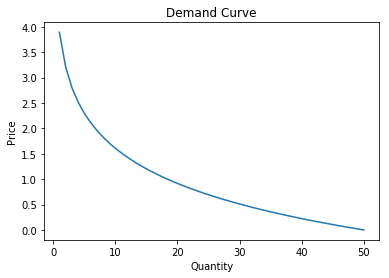

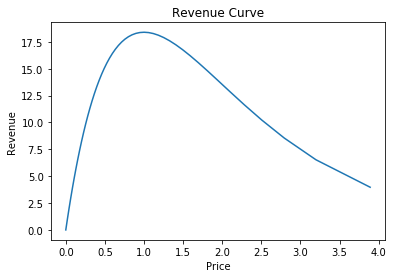

In [44]:
world = Curve(kind='log')
world.plot()
world.plot_revenue()

Of course there are demand curves of all shapes, over the range of goods available. The **cos** kind is here to experiment with a *concave* shape:

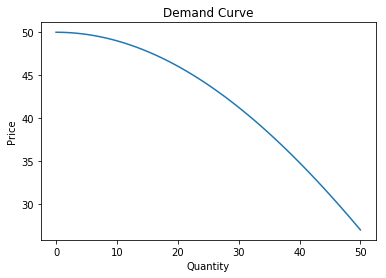

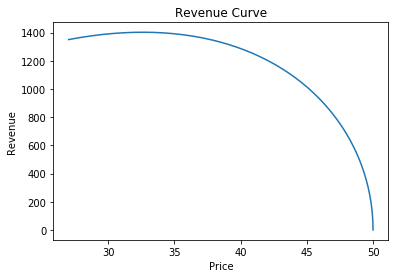

In [45]:
world = Curve(kind='cos')
world.plot()
world.plot_revenue()

In real world scenarios we know that the actual data will not fit such a smooth curve, so in the **noise** kind we've added some noise to the linear demand curve, yielding an ugly but more realistic revenue curve:

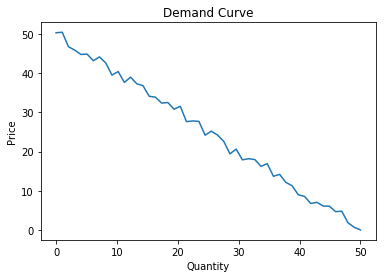

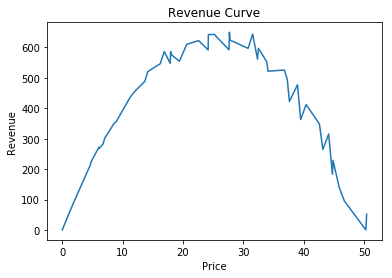

In [46]:
world = Curve(kind='noise')
world.plot()
world.plot_revenue()

## The Agent

As before, the **Agent** can be initialized with:
```
new = Agent()
```
This time, though, the **\_\_init\_\_** method takes care of connecting the *Agent* to the *Curve* via an internal *world* variable and sets up an empty dictionary called **memory** that will be used to keep track of the **sampled prices** (as *keys*) and their respected obtained **revenues** (as *values*). There are also two internal variables, **best_price** and **best_memory**, initially set to *None*, that are actually used only for plotting the best found value on the revenue graph.

The Agent has a sample method that relies on the sampling method of the environment to evaluate the state and populate the memory. The actual sampling works exactly the same as the environment, but the result is stored in the memory dictionary, as we can see running the cell below:

In [47]:
new = Agent()
new.sample(5)
new.sample(10)
new.sample(15)
new.sample(20)
new.sample()
new.memory

{5: 220, 10: 390, 15: 510, 20: 580, 25.510204081632654: 612.2448979591837}

The *Agent* is also equipped with two plotting methods that feeds on the memory dictionary of sampled values:

- **plot_revenue**: plots the revenue obtained as function of the price
- **plot_demand**: plots the estimated demand curve (the price as function of the quantity) 

Since we have already populated the memory with the four values above, we can see these methods in action:

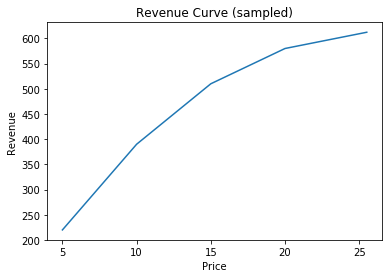

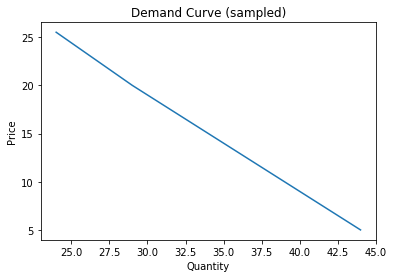

In [48]:
new.plot_revenue()
new.plot_demand()

There is also a **resetting** method, called **flush_mem()**, but it works a bit differently from the *reset()* in the sum example of the previous section. This method does reset the memory of the agent but it keeps the bound to the *Curve* environment, retaining the demand curve as we can see below:

In [49]:
new.memory, new.world

({5: 220, 10: 390, 15: 510, 20: 580, 25.510204081632654: 612.2448979591837},
 <__main__.Curve at 0x7fe609f65ef0>)

In [50]:
new.flush_mem()
new.memory, new.world

({}, <__main__.Curve at 0x7fe609f65ef0>)

## Naive learning rule
Just like we did before we can try to find the optimal price guessing randomly and store the highest revenue obtained overall as best revenue. Differently from the sum number task, here we don't know what the actual best revenue is, so we need to have a way to **terminate** the algorithm that would otherwise iterate forever. There are two kinds of halting algorithms that are provided:
    
- **deterministic**: early stopping breaks the algorithms after a certain number of steps are performed, it can be set via the steps parameter (by default is set to 9999)
- **stochastic**: the agent explores randomly a discrete and relatively small set of values, storing best_revenue. If best_revenue happens to be found 3 times without changing its value, learning is over. The number of times can be controlled via the occ parameter (higher occ means better accuracy but longer exec time)

By default, these algorithms are used in a **combination**, meaning that the algorithm stops either if *best_revenue* is found more than *occ* times or if the *number of cycles* exceeded the *steps* number. 

Let's see them work together and then one by one:

In [51]:
#combination (steps=9999,occ=3)
new = Agent()
new.run_rnd()

Run:0 Price:0.000 Revenue:0.000
Run:1 Price:40.816 Revenue:367.347
Run:2 Price:12.245 Revenue:453.061
Run:3 Price:3.061 Revenue:140.816
Run:4 Price:0.000 Revenue:0.000
Run:5 Price:21.429 Revenue:600.000
Run:6 Price:24.490 Revenue:612.245
Run:7 Price:26.531 Revenue:610.204
Run:8 Price:45.918 Revenue:183.673
Run:9 Price:25.510 Revenue:612.245
Run:10 Price:44.898 Revenue:224.490
Run:11 Price:40.816 Revenue:367.347
Run:12 Price:30.612 Revenue:581.633
Run:13 Price:3.061 Revenue:140.816
Run:14 Price:18.367 Revenue:569.388
Run:15 Price:26.531 Revenue:610.204
Run:16 Price:33.673 Revenue:538.776
Run:17 Price:10.204 Revenue:397.959
Run:18 Price:13.265 Revenue:477.551
Run:19 Price:10.204 Revenue:397.959
Run:20 Price:20.408 Revenue:591.837
Run:21 Price:26.531 Revenue:610.204
Run:22 Price:19.388 Revenue:581.633
Run:23 Price:36.735 Revenue:477.551
Run:24 Price:32.653 Revenue:555.102
Run:25 Price:20.408 Revenue:591.837
Run:26 Price:47.959 Revenue:95.918
Run:27 Price:33.673 Revenue:538.776
Run:28 Pric

(24.48979591836735, 612.2448979591837)

Firstly we make use of the *flush_mem()* method provided, to force the *Agent* to forget the performed learning. Then we adjust the parameters to obtain the stopping method that we want:
- for deterministic early stopping, lower the number of steps and increase the occ parameter
- for stochastic stopping, increase the number of steps and lower the occ parameter

In [52]:
#deterministic early stopping
new.flush_mem()
new.run_rnd(steps=5,occ=5)

Run:0 Price:21.429 Revenue:600.000
Run:1 Price:8.163 Revenue:334.694
Run:2 Price:3.061 Revenue:140.816
Run:3 Price:25.510 Revenue:612.245
Run:4 Price:46.939 Revenue:140.816
Best price:25.510 Best revenue:612.245


(25.510204081632654, 612.2448979591837)

In [53]:
#stochastic stopping
new.flush_mem()
new.run_rnd(steps=999999,occ=2)

Run:0 Price:0.000 Revenue:0.000
Run:1 Price:50.000 Revenue:0.000
Run:2 Price:10.204 Revenue:397.959
Run:3 Price:23.469 Revenue:610.204
Run:4 Price:28.571 Revenue:600.000
Run:5 Price:9.184 Revenue:367.347
Run:6 Price:10.204 Revenue:397.959
Run:7 Price:20.408 Revenue:591.837
Run:8 Price:11.224 Revenue:426.531
Run:9 Price:12.245 Revenue:453.061
Run:10 Price:22.449 Revenue:606.122
Run:11 Price:37.755 Revenue:453.061
Run:12 Price:36.735 Revenue:477.551
Run:13 Price:22.449 Revenue:606.122
Run:14 Price:46.939 Revenue:140.816
Run:15 Price:40.816 Revenue:367.347
Run:16 Price:47.959 Revenue:95.918
Run:17 Price:8.163 Revenue:334.694
Run:18 Price:42.857 Revenue:300.000
Run:19 Price:29.592 Revenue:591.837
Run:20 Price:23.469 Revenue:610.204
Best price:23.469 Best revenue:610.204


(23.46938775510204, 610.204081632653)

### Examining the algorithm
The *Agent* is provided with plotting methods to appreciate learning progress in a graphical fashion. There is a **plot** parameter that, if set to *True*, will call *plot_revenue* each iteration showing graphically how the *memory* dict is updated, along with the *best_value* and *best_revenue* variables. 

We can see how the *Agent* builds its own revenue curve according to the price set over time and we can highlight the *best_price* and the *best_revenue* as a red dot:

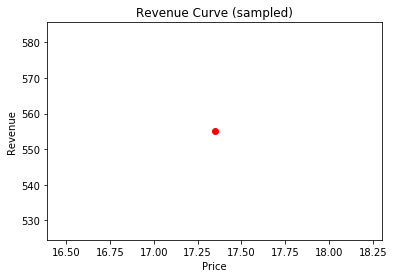

Run:0 Price:17.347 Revenue:555.102



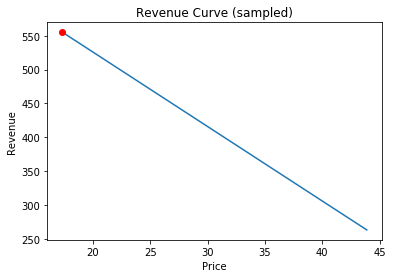

Run:1 Price:43.878 Revenue:263.265



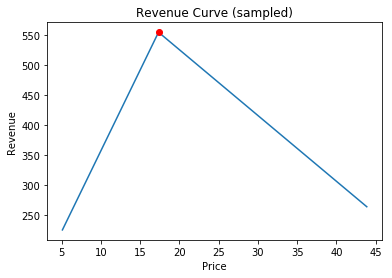

Run:2 Price:5.102 Revenue:224.490



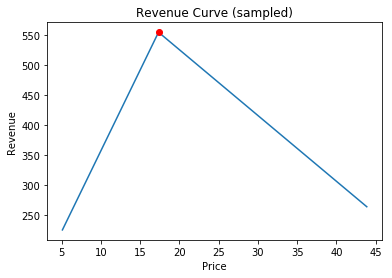

Run:3 Price:17.347 Revenue:555.102



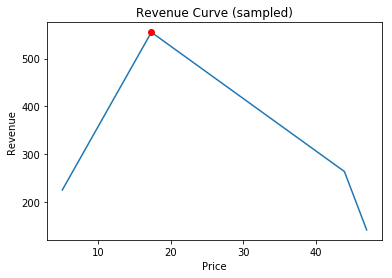

Run:4 Price:46.939 Revenue:140.816



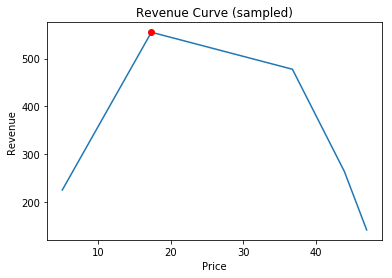

Run:5 Price:36.735 Revenue:477.551



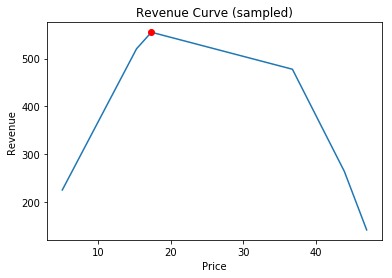

Run:6 Price:15.306 Revenue:520.408



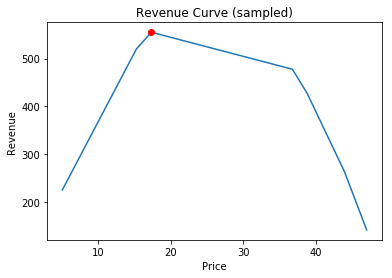

Run:7 Price:38.776 Revenue:426.531



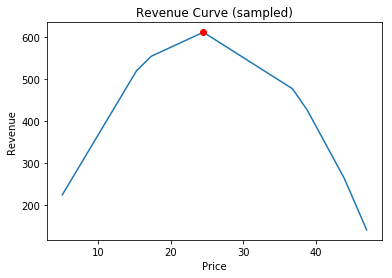

Run:8 Price:24.490 Revenue:612.245



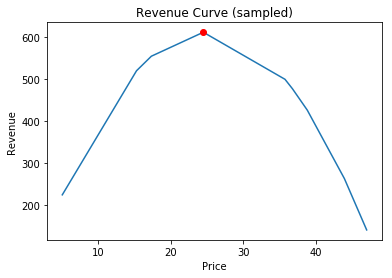

Run:9 Price:35.714 Revenue:500.000

Best price:24.490 Best revenue:612.245


(24.48979591836735, 612.2448979591837)

In [54]:
new.flush_mem()
new.run_rnd(steps=10,plot=True)

We can see how the learning has progressed so far and compare the **sampled curve** to the **actual revenue curve** (hidden in the world variable). 

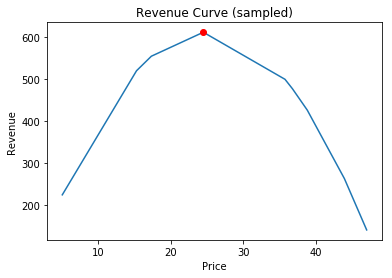

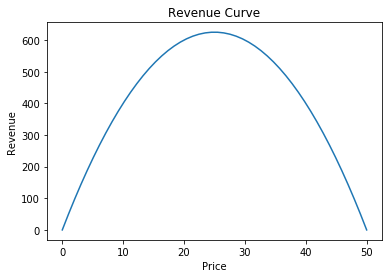

In [55]:
new.plot_revenue()
new.world.plot_revenue()

Let's try with a different environment and see the result after *100* steps:

Run:0 Price:22.715 Revenue:590.594
Run:1 Price:49.078 Revenue:0.000
Run:2 Price:35.427 Revenue:495.977
Run:3 Price:16.358 Revenue:523.457
Run:4 Price:22.715 Revenue:590.594
Run:5 Price:12.591 Revenue:465.856
Run:6 Price:49.078 Revenue:0.000
Run:7 Price:10.078 Revenue:413.189
Run:8 Price:43.671 Revenue:174.686
Run:9 Price:33.332 Revenue:533.318
Run:10 Price:20.323 Revenue:548.732
Run:11 Price:37.598 Revenue:451.174
Run:12 Price:49.078 Revenue:0.000
Run:13 Price:4.600 Revenue:211.594
Run:14 Price:22.715 Revenue:590.594
Best price:22.715 Best revenue:590.594


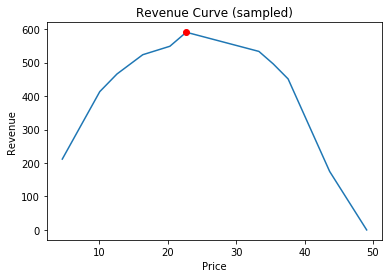

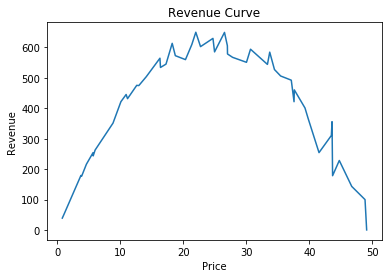

In [56]:
new = Agent(kind='noise')
new.run_rnd(steps=100)
new.plot_revenue()
new.world.plot_revenue()

## An improved learning rule
The naive random algorithm works well in a simulation of a restricted environment, but in a real world case no shop-keeper would accept to randomly change the price of his goods. What we need is a procedure to **gradually adapt** the price to the optimal value: the first price is guessed randomly and then it's progressively incresead or decreased, according to which operation has the highest revenue.

The simplest implementation of this algorithm is to decide a fixed **step**, a change in price that we are willing to explore. In the **run_smart()** method this step is a parameter named **rate**, and by default is set to *1*. The important question to answer here is "*when do we stop?*" Of course we cannot scan the entire array of values, otherwise we would be hardly better off than using the *run_rnd* algorithm. The easiest answer would be "*we stop when we see the revenue decreasing*". This way we are actually using the information that we have just sampled and we know which direction to go. Of course this choice is very **greedy**, we might find ourself stuck in a **local optimal price**, a false maximum of the reward, and not in the global optimal price, but nonetheless it's the easiest choice that we can make, a bit naive certainly, but works well for educational purposes.

Let's run the algorithm and see how it performs on the linear demand curve:

Run:1 Price:11.224 Revenue:426.531
Exploring rx price:12.224 yielding revenue:0.000
Exploring lx price:10.224 yielding revenue:0.000


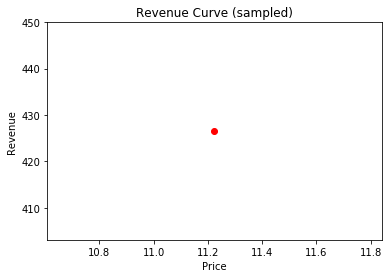

Run:2 Price:12.224 Revenue:452.306
Exploring rx price:13.224 yielding revenue:452.306
Exploring lx price:11.224 yielding revenue:398.755


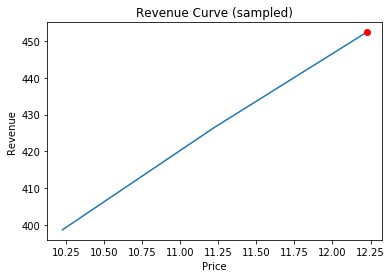

Run:3 Price:13.224 Revenue:476.082
Exploring rx price:14.224 yielding revenue:476.082
Exploring lx price:12.224 yielding revenue:426.531


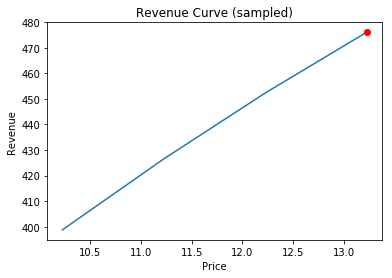

Run:4 Price:14.224 Revenue:497.857
Exploring rx price:15.224 yielding revenue:497.857
Exploring lx price:13.224 yielding revenue:452.306


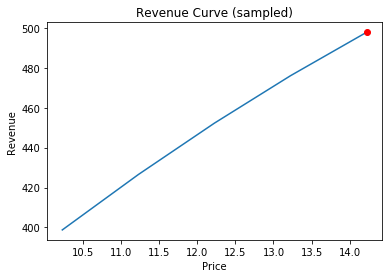

Run:5 Price:15.224 Revenue:517.633
Exploring rx price:16.224 yielding revenue:517.633
Exploring lx price:14.224 yielding revenue:476.082


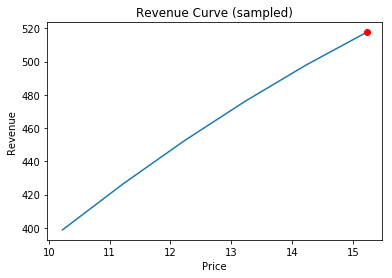

Run:6 Price:16.224 Revenue:535.408
Exploring rx price:17.224 yielding revenue:535.408
Exploring lx price:15.224 yielding revenue:497.857


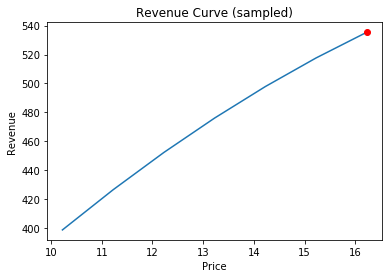

Run:7 Price:17.224 Revenue:551.184
Exploring rx price:18.224 yielding revenue:551.184
Exploring lx price:16.224 yielding revenue:517.633


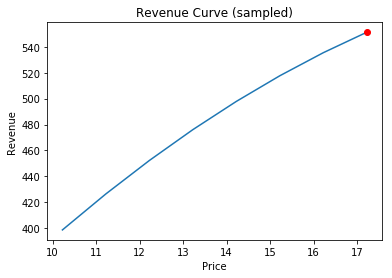

Run:8 Price:18.224 Revenue:564.959
Exploring rx price:19.224 yielding revenue:564.959
Exploring lx price:17.224 yielding revenue:535.408


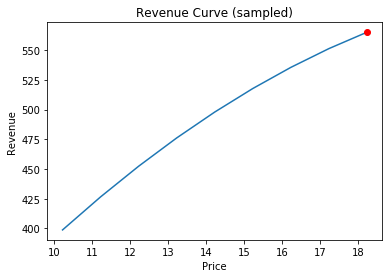

Run:9 Price:19.224 Revenue:576.735
Exploring rx price:20.224 yielding revenue:576.735
Exploring lx price:18.224 yielding revenue:551.184


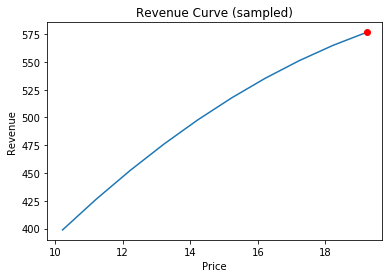

Run:10 Price:20.224 Revenue:586.510
Exploring rx price:21.224 yielding revenue:586.510
Exploring lx price:19.224 yielding revenue:564.959


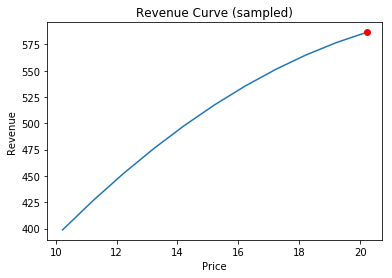

Run:11 Price:21.224 Revenue:594.286
Exploring rx price:22.224 yielding revenue:594.286
Exploring lx price:20.224 yielding revenue:576.735


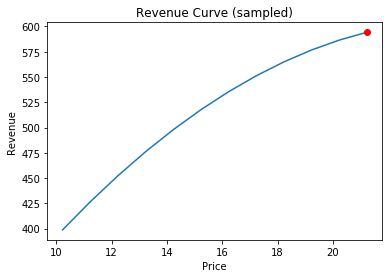

Run:12 Price:22.224 Revenue:600.061
Exploring rx price:23.224 yielding revenue:600.061
Exploring lx price:21.224 yielding revenue:586.510


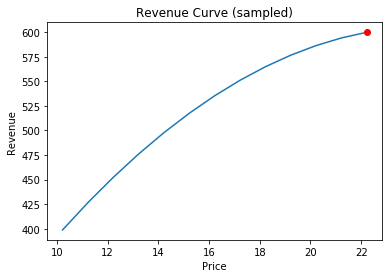

Run:13 Price:23.224 Revenue:603.837
Exploring rx price:24.224 yielding revenue:603.837
Exploring lx price:22.224 yielding revenue:594.286


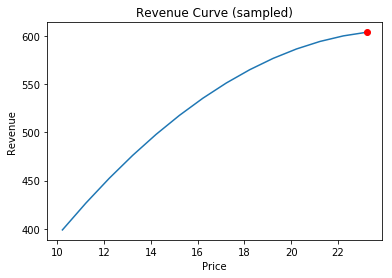

Run:14 Price:24.224 Revenue:605.612
Exploring rx price:25.224 yielding revenue:605.612
Exploring lx price:23.224 yielding revenue:600.061


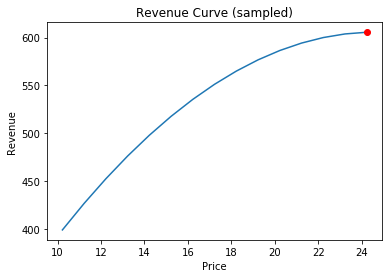

Run:15 Price:24.224 Revenue:605.612
Exploring rx price:25.224 yielding revenue:605.388
Exploring lx price:23.224 yielding revenue:603.837


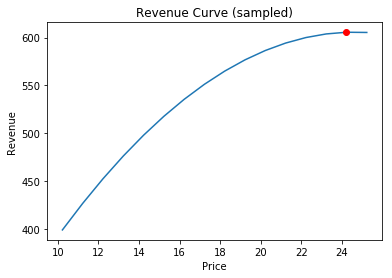

Run:16 Price:24.224 Revenue:605.612
Exploring rx price:25.224 yielding revenue:605.388
Exploring lx price:23.224 yielding revenue:603.837


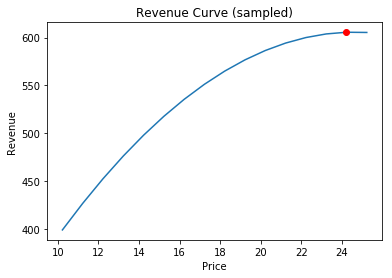

Best price:24.224 Best revenue:605.612


(24.224489795918366, 605.6122448979592)

In [57]:
new = Agent()
new.run_smart(plot=True)

There are a couple of things to notice right away. Firstly the algorithm converges **very quickly** to the optimal value (or at least very close to it), it always takes less than *25 cycles*, since we are working with *50 points*. This is because we are basically exploring only half of the demand curve, as you can see the revenue curve looks like a *half-parabola*. Then take a look at the red dot, it's always on the edge of the curve. This is because the closest revenue prices have just been explored and not yet exploited, we are not in that state yet. What happens it's really clear if you look at the plots of the sampled revenue vs the actual revenue:

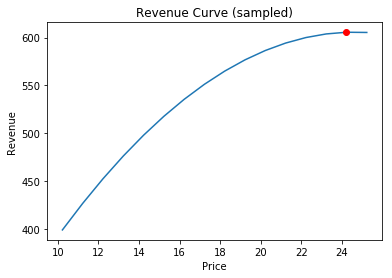

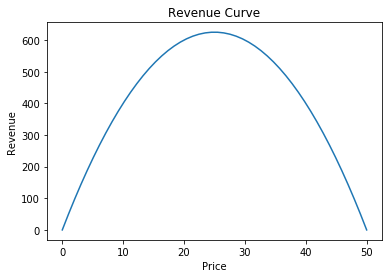

In [58]:
new.plot_revenue()
new.world.plot_revenue()

This looks remarkable, let's try it on other kinds of curves:

Run:1 Price:0.847 Revenue:16.946
Exploring rx price:1.047 yielding revenue:0.000
Exploring lx price:0.647 yielding revenue:0.000


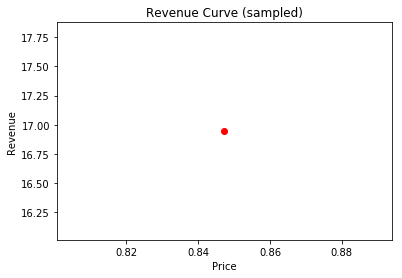

Run:2 Price:0.847 Revenue:16.946
Exploring rx price:1.047 yielding revenue:16.757
Exploring lx price:0.647 yielding revenue:16.182


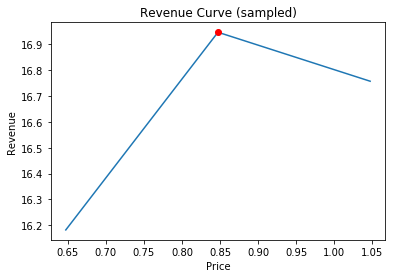

Run:3 Price:0.847 Revenue:16.946
Exploring rx price:1.047 yielding revenue:16.757
Exploring lx price:0.647 yielding revenue:16.182


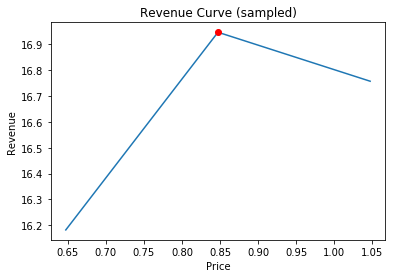

Best price:0.847 Best revenue:16.946


(0.8472978603872034, 16.94595720774407)

In [59]:
new = Agent('log')
new.run_smart(rate=0.2,plot=True)

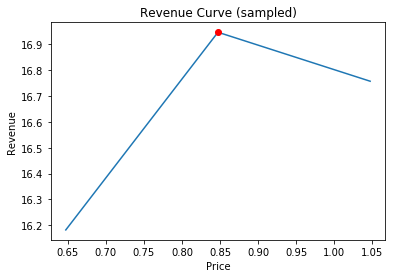

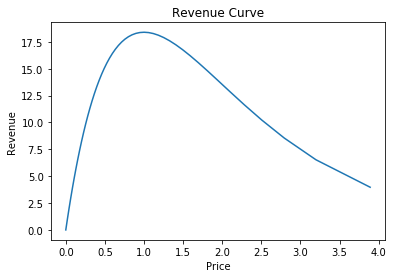

In [60]:
new.plot_revenue()
new.world.plot_revenue()

Run:1 Price:8.374 Revenue:343.354
Exploring rx price:9.374 yielding revenue:0.000
Exploring lx price:7.374 yielding revenue:0.000


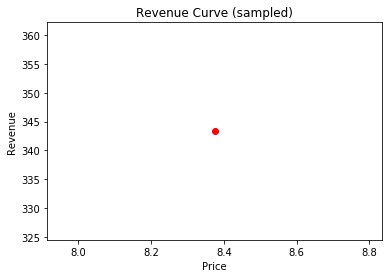

Run:2 Price:9.374 Revenue:374.980
Exploring rx price:10.374 yielding revenue:374.980
Exploring lx price:8.374 yielding revenue:302.354


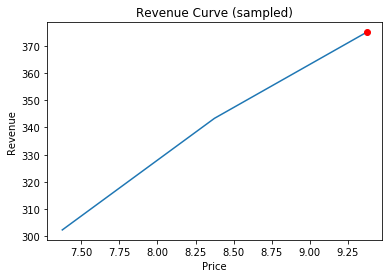

Run:3 Price:10.374 Revenue:394.231
Exploring rx price:11.374 yielding revenue:394.231
Exploring lx price:9.374 yielding revenue:343.354


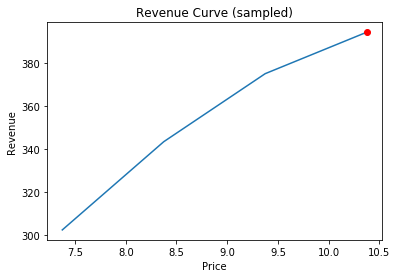

Run:4 Price:11.374 Revenue:443.605
Exploring rx price:12.374 yielding revenue:443.605
Exploring lx price:10.374 yielding revenue:374.980


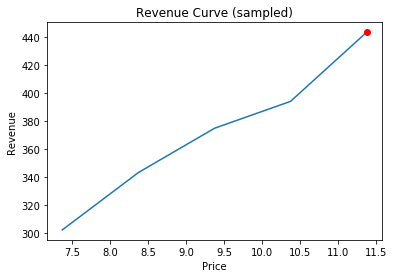

Run:5 Price:12.374 Revenue:445.482
Exploring rx price:13.374 yielding revenue:445.482
Exploring lx price:11.374 yielding revenue:394.231


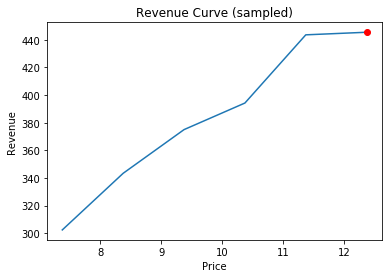

Run:6 Price:13.374 Revenue:481.482
Exploring rx price:14.374 yielding revenue:481.482
Exploring lx price:12.374 yielding revenue:443.605


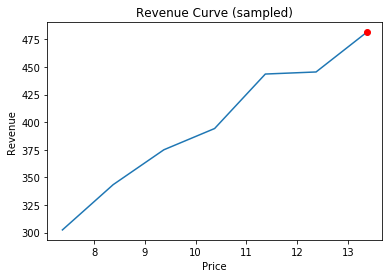

Run:7 Price:14.374 Revenue:503.107
Exploring rx price:15.374 yielding revenue:503.107
Exploring lx price:13.374 yielding revenue:445.482


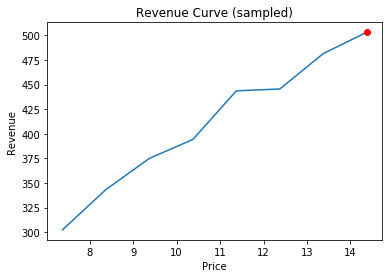

Run:8 Price:15.374 Revenue:538.107
Exploring rx price:16.374 yielding revenue:538.107
Exploring lx price:14.374 yielding revenue:481.482


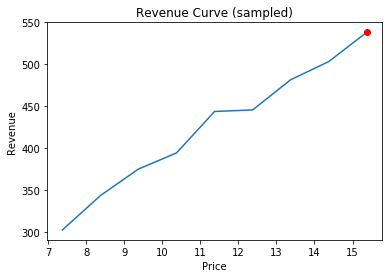

Run:9 Price:16.374 Revenue:540.358
Exploring rx price:17.374 yielding revenue:540.358
Exploring lx price:15.374 yielding revenue:503.107


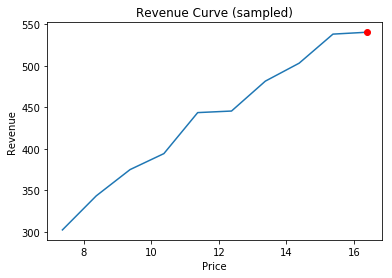

Run:10 Price:17.374 Revenue:555.984
Exploring rx price:18.374 yielding revenue:555.984
Exploring lx price:16.374 yielding revenue:538.107


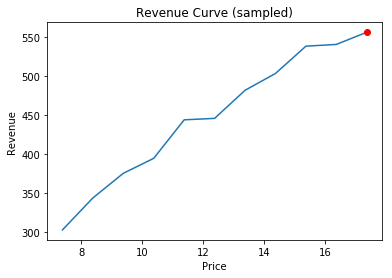

Run:11 Price:18.374 Revenue:587.984
Exploring rx price:19.374 yielding revenue:587.984
Exploring lx price:17.374 yielding revenue:540.358


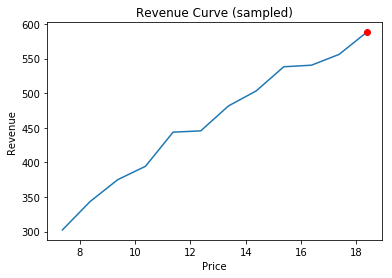

Run:12 Price:19.374 Revenue:600.609
Exploring rx price:20.374 yielding revenue:600.609
Exploring lx price:18.374 yielding revenue:555.984


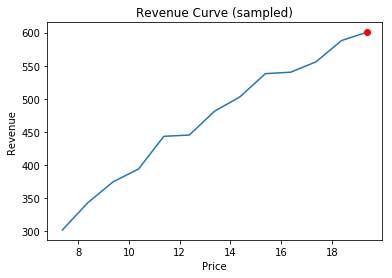

Run:13 Price:20.374 Revenue:631.609
Exploring rx price:21.374 yielding revenue:631.609
Exploring lx price:19.374 yielding revenue:587.984


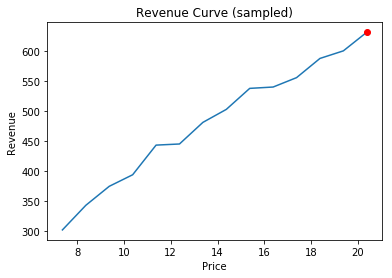

Run:14 Price:20.374 Revenue:631.609
Exploring rx price:21.374 yielding revenue:598.486
Exploring lx price:19.374 yielding revenue:600.609


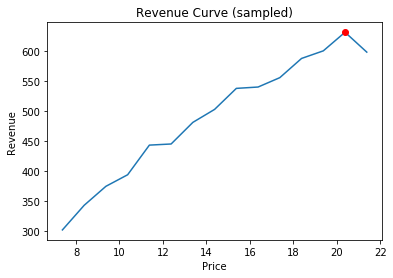

Run:15 Price:20.374 Revenue:631.609
Exploring rx price:21.374 yielding revenue:598.486
Exploring lx price:19.374 yielding revenue:600.609


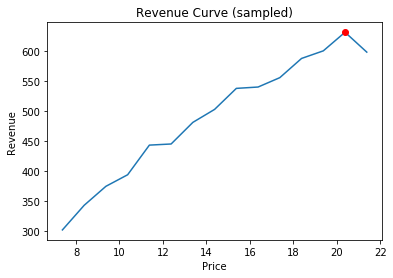

Best price:20.374 Best revenue:631.609


(20.374496505987928, 631.6093916856257)

In [61]:
new = Agent('noise')
new.run_smart(plot=True)

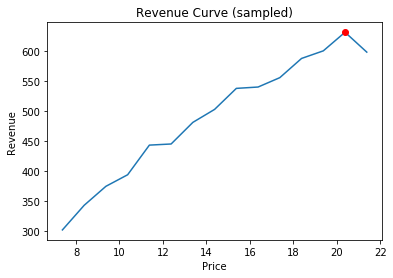

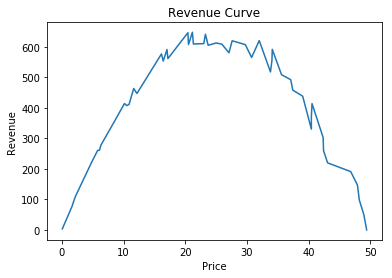

In [62]:
new.plot_revenue()
new.world.plot_revenue()

We observe that **run_smart** works well with **monotonic** demand curves, while its **greediness** forces it to break with curves with local minima or maxima. The greediness that we are referring to here, it is more generally understood as taking into consideration only the **immediate reward** of the action and there are different ways to overcome this problem. One can be to keep **exploring** the environment, for example **doubling** the exploration rate of the *Agent* when we see that it is stuck on a certain price. Another choice could be to use the already cited **ε-greedy**, introducing a stochastic parameter that allows the *Agent* to randomly jump in another state with a certain given (but small) probability, much in the fashion of gradient descent in neural networks.    

# Conclusions
In this notebook we have introduced the topic of **reinforcement learning** and we have applied it to simple tasks via the mean of **dynamic programming** techniques. In particular we have treated both the **perfect** and **imperfect knowledge problem**, leading to the notion of the **exploration-exploitation tradeoff** in modeling immediate reward phenomena. 

Using simulations we have proved that in a limited environment, where exploration is feasible, a **random choice model** might be suited to accomplish simple tasks, although not strictly in the way of reinforcement learning. We have compared the random choice model with an **iterative model** that improves upon the rewards obtained, highlighting the differences in the results. 

Most importantly we gave prominence to the problem of selecting a **policy**, and we have seen that there are many elements that involve a human choice in the code design, such as promoting an action over another, choosing the way to terminate the learning, and favoring immediate rewards or future ones. 

Finally we have applied this knowledge to face an economic task related to **intelligent pricing**, developing a small framework to carry on simulations in-silico. The results of the experiments were promising but not yet  conclusive, while they surely provide an interesting educational tool more work needs to be done on the algorithmic development to make it useful in real world cases.